LOGISTIC IS LINEAR CLASSIFIER AND K-NN IS NON LINEAR CLASSIFIER

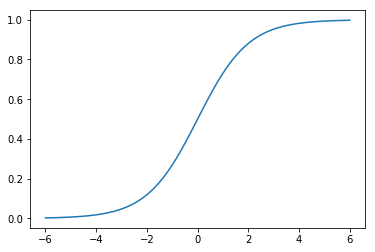

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x=np.linspace(-6,6,num=1000)
plt.plot(x,1/(1+np.exp(-x)))
plt.show()

In [2]:
t= [0.1,0,0.8,0.6,0.51]
np.round(t)

array([0., 0., 1., 1., 1.])

In [3]:
np.array(t) >0.6

array([False, False,  True, False, False])

In [2]:
dataset2 = [[ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.4,  0. ],
            [ 0.3,  0. ],
            [ 0.2,  0. ],
            [ 0.2,  0. ],
            [ 0.1,  0. ],
            [ 1.4,  1. ],
            [ 1.5,  1. ],
            [ 1.5,  1. ],
            [ 1.3,  1. ],
            [ 1.5,  1. ],
            [ 1.3,  1. ],
            [ 1.6,  1. ],
            [ 1. ,  1. ],
            [ 1.3,  1. ],
            [ 1.4,  1. ]]


In [3]:
import numpy as np
x = np.array(dataset2)[:,0:1]
y = np.array(dataset2)[:,1]

In [4]:
from sklearn.linear_model import LogisticRegression
obj = LogisticRegression(C = 1.0, penalty ='l1' , tol= 0.001)
obj.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)

In [5]:
obj.predict(x)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [6]:
obj.predict(x) == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [7]:

for i in np.array(dataset2)[:,0]:
    y = 1.0/(1.0+np.exp(-i))
    print(np.round(y))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( random_state = 0)
classifier.fit(x,y)
y_pred = classifier.predict(y)
                                

ValueError: bad input shape ()

In [ ]:
y_pred

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

d1=pd.read_csv(r'C:\Users\LENOVO\Desktop\Machine Learning A-Z Template Folder\Part 3 - Classification\Section 14 - Logistic Regression\Logistic_Regression\Social_Network_Ads.csv')


#split into independent and dependent variable
x=d1.iloc[:, [2,3]].values
#we will not be adding no column
y=d1.iloc[:,-1].values

from  sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state =0)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)



from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)



#predicting the neew result 
y_pred = classifier.predict(x_test)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


##ompute confusion matrix to evaluate the accuracy of a classification##

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


array([[65,  3],
       [ 8, 24]])

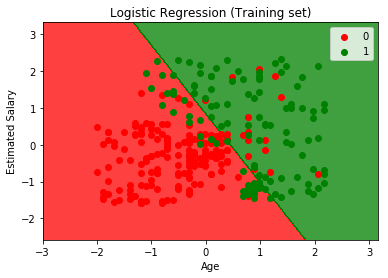

In [29]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()  

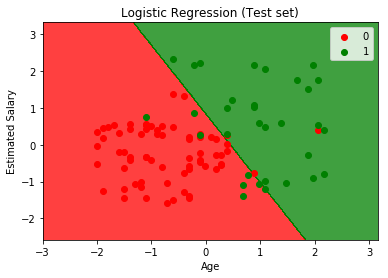

In [31]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


d1=pd.read_csv(r'F:\csvfile\bcancer.csv') 


In [25]:
d1.head()

,Unnamed: 0,Unames,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoi,Mitoses,Class
0,0,1002945,5,4,4,5,7,10,3,2,1,2
1,1,1015425,3,1,1,1,2,2,3,1,1,2
2,2,1016277,6,8,8,1,3,4,3,7,1,2
3,3,1017023,4,1,1,3,2,1,3,1,1,2
4,4,1017122,8,10,10,8,7,10,9,7,1,4


In [26]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 12 columns):
Unnamed: 0                      698 non-null int64
Unames                          698 non-null int64
Sample Code Number              698 non-null int64
Clump Thickness                 698 non-null int64
Uniformity of Cell Size         698 non-null int64
Marginal Adhesion               698 non-null int64
Single Epithelial Cell Size     698 non-null int64
Bare Nuclei                     698 non-null object
Bland Chromatin                 698 non-null int64
Normal Nucleoi                  698 non-null int64
Mitoses                         698 non-null int64
Class                           698 non-null int64
dtypes: int64(11), object(1)
memory usage: 65.5+ KB


In [27]:
d1[d1['Bare Nuclei'] == '?']

,Unnamed: 0,Unames,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoi,Mitoses,Class
22,22,1057013,8,4,5,1,2,?,7,3,1,4
39,39,1096800,6,6,6,9,6,?,7,8,1,2
138,138,1183246,1,1,1,1,1,?,2,1,1,2
144,144,1184840,1,1,3,1,2,?,2,1,1,2
157,157,1193683,1,1,2,1,3,?,1,1,1,2
163,163,1197510,5,1,1,1,2,?,3,1,1,2
234,234,1241232,3,1,4,1,2,?,3,1,1,2
248,248,169356,3,1,1,1,2,?,3,1,1,2
274,274,432809,3,1,3,1,2,?,2,1,1,2
291,291,563649,8,8,8,1,2,?,6,10,1,4


In [34]:
d1['Bare Nuclei'].replace('?',np.NAN,inplace = True)

In [28]:

x1= d1.drop(['Unnamed: 0','Unames','Class' ],axis =1)
y1= d1['Class']
x_col = x1.columns
d1.head()

,Unnamed: 0,Unames,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoi,Mitoses,Class
0,0,1002945,5,4,4,5,7,10,3,2,1,2
1,1,1015425,3,1,1,1,2,2,3,1,1,2
2,2,1016277,6,8,8,1,3,4,3,7,1,2
3,3,1017023,4,1,1,3,2,1,3,1,1,2
4,4,1017122,8,10,10,8,7,10,9,7,1,4


In [35]:
x = d1.iloc[:,2:].values
y = d1.iloc[:,-1].values
x[x[:,5] =='?']

array([], shape=(0, 10), dtype=object)

In [38]:
x[:,5].shape

(698,)

In [42]:
from sklearn.preprocessing import Imputer
im = Imputer(missing_values= 'NaN',strategy='mean',axis = 1)
Imputer?
x[:,5] = im.fit_transform(x[:,5])

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [45]:

from  sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state =0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
y_pred =classifier.predict(x_test)


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[107,   1],
       [  0,  67]])

In [50]:
classifier.score(x_test,y_test)

0.9942857142857143

In [1]:
from sklearn.metrics import accuracy_score?

Object `accuracy_score` not found.


In [2]:
from sklearn.metrics import 

In [3]:
accuracy_score?